# Machine Learning 

Now we shall proceed to machine learning part of our project.

---



In [82]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.pyplot import figure

sb.set() # set the default Seaborn style for graphics

#Libraires to read multiple csv files
import os
import glob

import pickle # to save dataframe

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
# read finalized_df.csv
finalized_df = pd.read_pickle('finalized_df.pkl')

# load dfs_dict
dfs_dict = np.load('dfs_dict.npy',allow_pickle='TRUE').item()

## Data Preparation for Model Training

---
### Train-Test Split

Since we want to predict HALE and LE from other predictors and compare their performances, we will create two dataframes; one for each. Note that HALE and LE are dependent on each other, so in order to improve the accuracy of our models, we will remove HALE column in LE dataframe and vice versa. 

We split both the HALE and LE data in into 80% train data, 20% test data. We do this two times: one where we predict HALE and one wheer we predict life expectancy.

In [84]:
#HALE dataframe 
HALE_df = finalized_df.copy()
HALE_df.drop("Life expectancy at birth, total (years)", axis = 1 , inplace = True)

#LE dataframe
LE_df = finalized_df.copy()
LE_df.drop("HALE", axis = 1 , inplace = True)

In [85]:
#For HALE dataset
HALE_X = HALE_df.loc[: , HALE_df.columns != 'HALE'] #all variables except HALE are predictors
HALE_y = HALE_df['HALE'] #HALE is the response variable


#For LE dataset
LE_X = LE_df.loc[: , LE_df.columns != 'Life expectancy at birth, total (years)'] #all variables except LE are predictors
LE_y = LE_df['Life expectancy at birth, total (years)'] #LE is the response variable

In [86]:
from sklearn.model_selection import train_test_split
#train test splits for x and y for HALE
X_train_hale, X_test_hale, y_train_hale, y_test_hale = train_test_split(HALE_X, HALE_y, test_size = 0.2, shuffle=True)


#train test splits for x and y for LE
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(LE_X, LE_y, test_size = 0.2, shuffle=True)

---
### Model Evaluation Utility Functions

First we will define some useful utility functions to aid our models.

In [87]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values
    :param actual: actual dataset
    :param predicted: predicted dataset
    :returns: MSE'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [88]:
def pred_HALE(country, model):
    '''
    predicts the health-adjusted life expectancy (HALE) for a country from 2000-2019, and plots a graph of predicted HALE against actual HALE.
    :param country: name of the country
    :param model: the model used
    '''
    idx = list(HALE_df.index).index(country + ' - 2000')
    country_data = HALE_df.iloc[idx:idx+20]

    y_pred = pd.DataFrame(country_data["HALE"]) #response variable
    x_pred = pd.DataFrame(country_data[country_data.columns[country_data.columns != 'HALE']]) #predicting variables 

    country_preds = model.predict(x_pred)

    # plot predicted against actual
    year = [x for x in range(2000,2020)]
    figure(figsize=(16, 6), dpi=80)
    plt.plot(year, country_preds, label = "Predicted HALE", color='blue')
    plt.plot(year, y_pred, label = "Actual HALE", color='green')
    plt.xticks(year)
    plt.ylabel("Years")
    plt.title("Predicted versus Actual HALE for " + country, fontweight="bold")
    plt.legend()
    plt.show()

In [89]:
def pred_LE(country, model):
    '''
    predicts the health-adjusted life expectancy (HALE) for a country from 2000-2019, and plots a graph of predicted LE against actual LE.
    :param country: name of the country
    :param model: the model used
    '''
    idx = list(LE_df.index).index(country + ' - 2000')
    country_data = LE_df.iloc[idx:idx+20]

    y_pred = pd.DataFrame(country_data["Life expectancy at birth, total (years)"]) #response variable
    x_pred = pd.DataFrame(country_data[country_data.columns[country_data.columns != 'Life expectancy at birth, total (years)']]) #predicting variables 

    country_preds = model.predict(x_pred)
    
    # plot predicted against actual
    year = [x for x in range(2000,2020)]
    figure(figsize=(16, 6), dpi=80)
    plt.plot(year, country_preds, label = "Predicted Life Expectancy", color='blue')
    plt.plot(year, y_pred, label = "Actual Life Expectancy", color='green')
    plt.xticks(year)
    plt.ylabel("Years")
    plt.title("Predicted versus Actual Life Expectancy for " + country, fontweight="bold")
    plt.legend()
    plt.show()

---
## Multivariate Linear Regression 

We will start off by using a simple linear regression model to get a feel of how our datasets perform in a model.

In [90]:
from sklearn.linear_model import LinearRegression

Intercept 	: b =  51.66972735442821
Coefficients 	: a =  [ 1.44323438e-01 -2.83047854e-01 -7.84396335e-02  1.44363743e-02
  1.87304657e-03  1.14880529e-04  4.31082977e-02  5.16551712e-04
  2.35100506e-09]
Explained Variance (R^2) 	: 0.7214226909065999
Mean Squared Error (MSE) 	: 16.417347969486084
Root Mean Squared Error (RMSE) 	: 4.0518326680017385


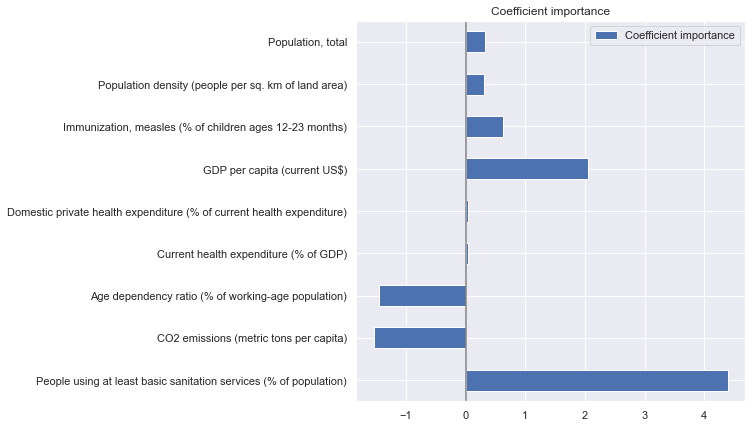

In [91]:
# Create a Linear Regression object to predict HALE
linreg_HALE = LinearRegression()

# train the model on train data
linreg_HALE.fit(X_train_hale, y_train_hale)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg_HALE.intercept_)
print('Coefficients \t: a = ', linreg_HALE.coef_)

# Predict HALE according to test data
preds = linreg_HALE.predict(X_test_hale)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_HALE.score(X_test_hale, y_test_hale))
mse = mean_sq_err(y_test_hale, preds)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

coefs = pd.DataFrame(
    linreg_HALE.coef_ * X_train_hale.std(axis=0), # multiply by standard deviation to give coeffs same "weightage"
    columns=["Coefficient importance"],
    index=(X_train_hale.columns),
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficient importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Intercept 	: b =  60.21346638008037
Coefficients 	: a =  [ 1.61777619e-01 -3.06999024e-01 -1.17819572e-01  9.64421268e-02
 -2.84257255e-02  1.43153092e-04  6.12816103e-02  4.63365864e-04
  2.66930639e-09]
Explained Variance (R^2) 	: 0.7886771868138015
Mean Squared Error (MSE) 	: 17.83143380847846
Root Mean Squared Error (RMSE) 	: 4.222728242318994


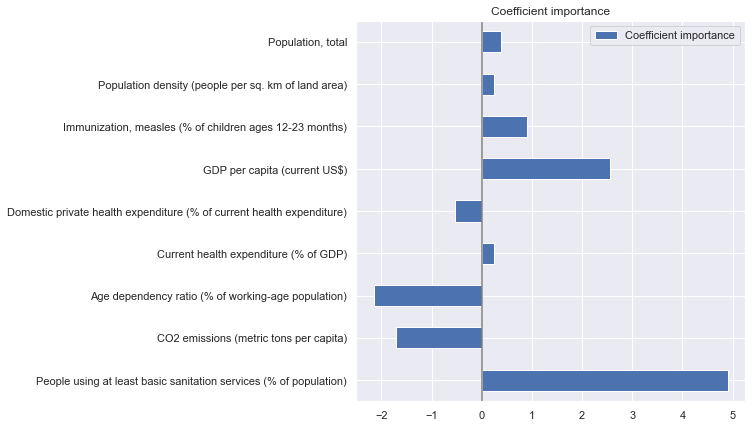

In [92]:
# Create a Linear Regression object to predict LE
linreg_LE = LinearRegression()

# train the model on train data
linreg_LE.fit(X_train_le, y_train_le)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg_LE.intercept_)
print('Coefficients \t: a = ', linreg_LE.coef_)

# Predict LE according to test data
preds = linreg_LE.predict(X_test_le)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_LE.score(X_test_le, y_test_le))
mse = mean_sq_err(y_test_le, preds)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

coefs = pd.DataFrame(
    linreg_LE.coef_ * X_train_le.std(axis=0), # multiply by standard deviation to give coeffs same "weightage"
    columns=["Coefficient importance"],
    index=(X_train_le.columns),
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficient importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The model for HALE has lower MSE and RMSE but also lower R^2 value. Since R^2 can be considered a standardized measure of degree of predictedness, while MSE and RMSE could be affected by the variance in the data or the scaling of the metrics, we use R^2 to evaluate accuracy instead of MSE and RMSE. Based on the R^2 value, The model trained to predict life expectancy seems to perform better than the model trained to predict HALE. This could be because the metrics we selected as predictors are better suited to predicting HALE than LE, or it could mean that the relationships between HALE and the metrics are more nonlinear.

It is interesting to see that the metrics are ranked similarly in predicting both HALE and life expectancy, with the exception of CO2 emissions and age dependency ratio whose importances have been swapped. However, their magnitudes are slightly different. Particularly, domestic health expenditure and current health expenditure previously had a negligible impact in predicting HALE, but they have a non-negligible impact in predicting life expectancy.

Let's try to visualise our results for HALE and LE using pred_HALE and pred_LE functions on a sample country. 

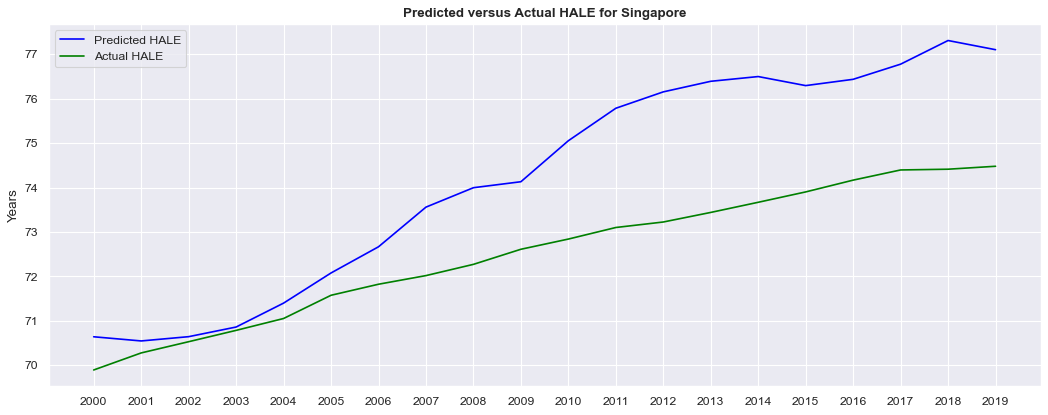

In [93]:
pred_HALE('Singapore', linreg_HALE)

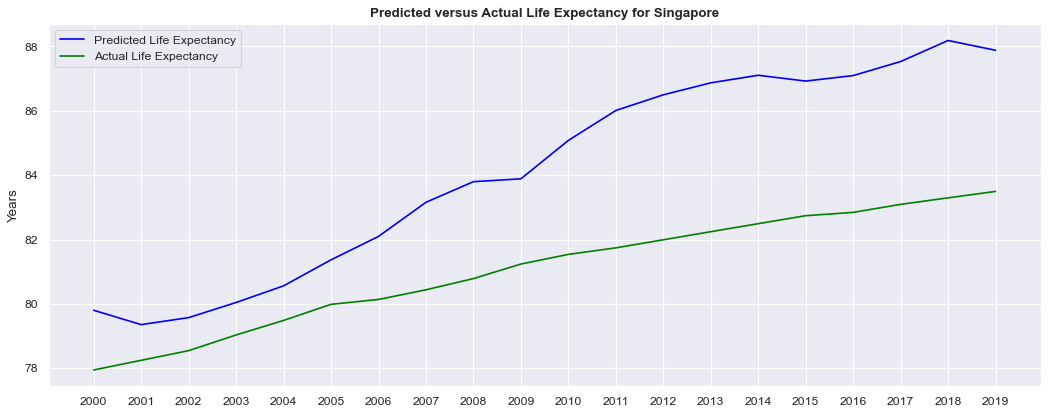

In [94]:
pred_LE("Singapore", linreg_LE)

The predictions for HALE and life expectancy are extremely similar, which could be because the coefficients for the metrics in both models are similar.

Overall, linear regression seems to be quite effective for predicting HALE and LE as the R^2 score for each model is relatively decent. However, for the HALE model, R^2 is lower, which suggests that the metrics may not be as linearly related to HALE. 

Perhaps a regression tree model could be more effective in predicting HALE and LE as it is able to better capture nonlinear relationships between variables.

---

## Regression Trees

For our regression tree model, we limit the maximum depth of the tree to 6 and prune leaves that add less than 1% accuracy to the model to prevent overfitting.

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8463836476036599
Mean Squared Error (MSE) 	: 9.053045703188834
Root Mean Squared Error (RMSE) 	: 3.00882796171347


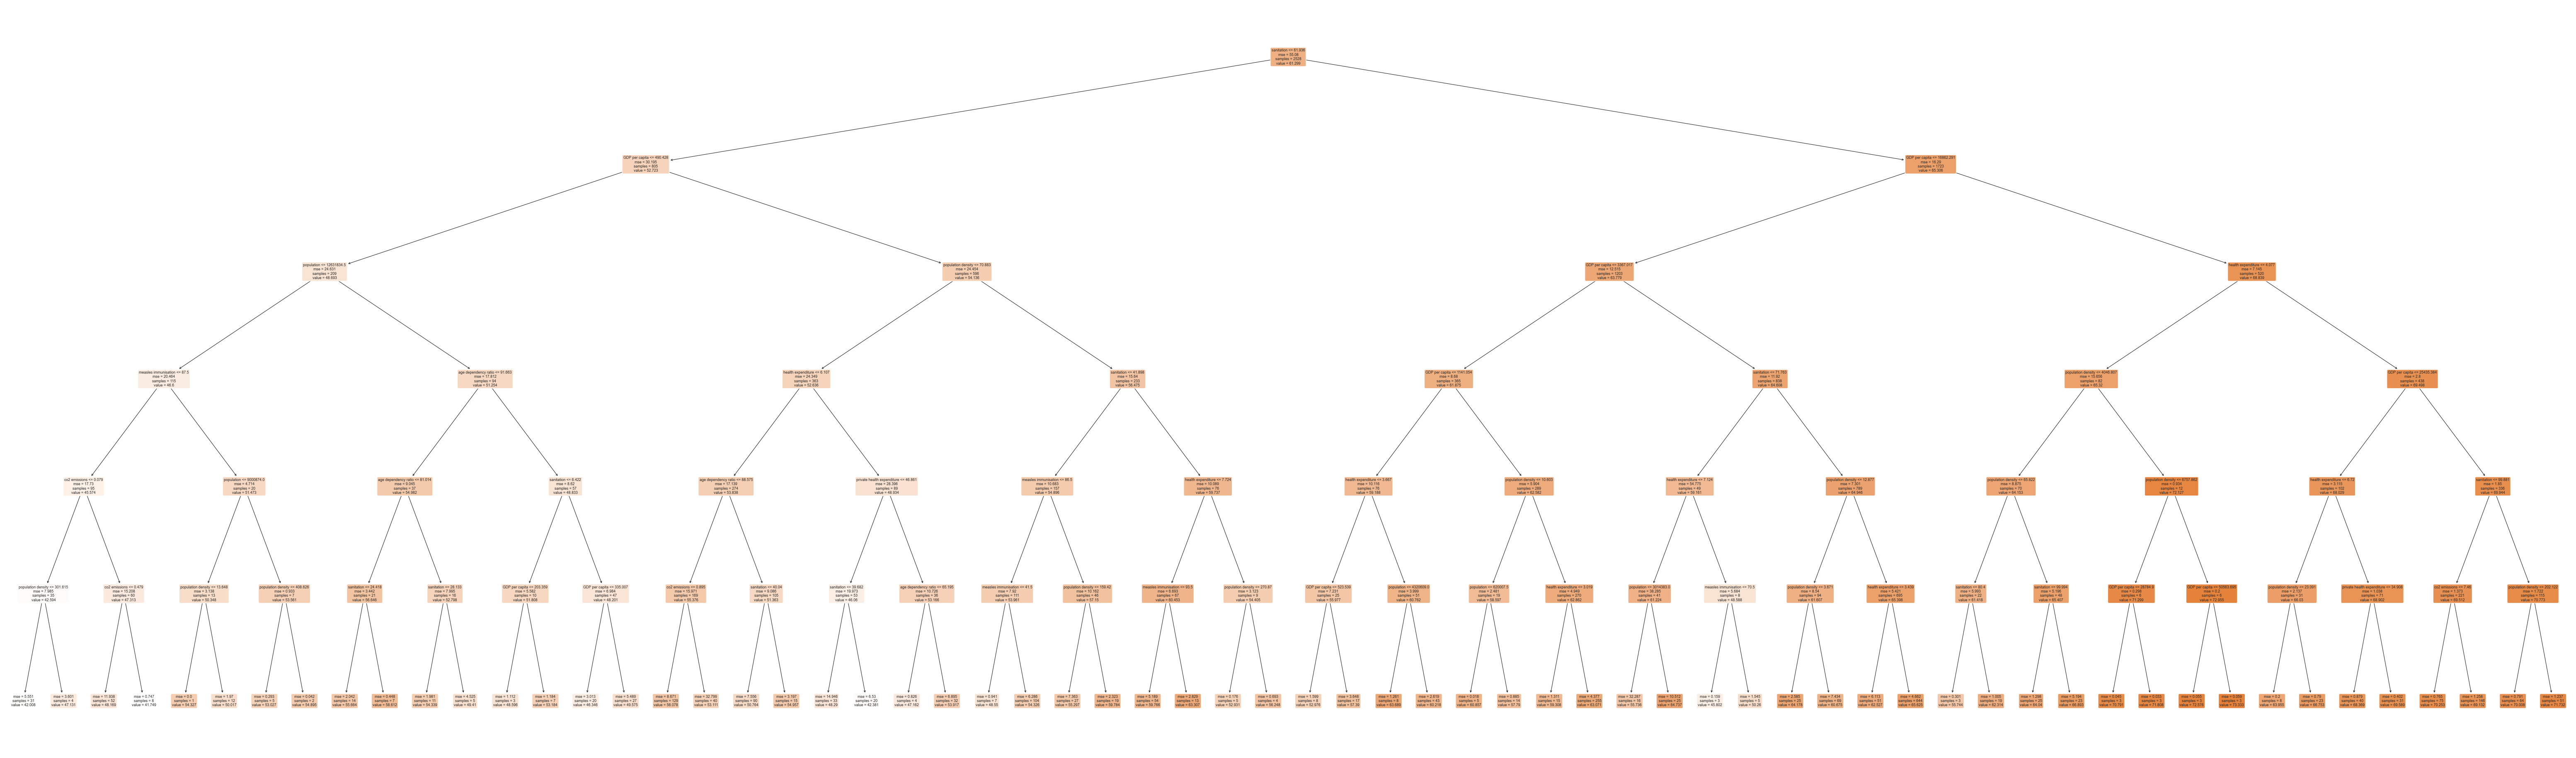

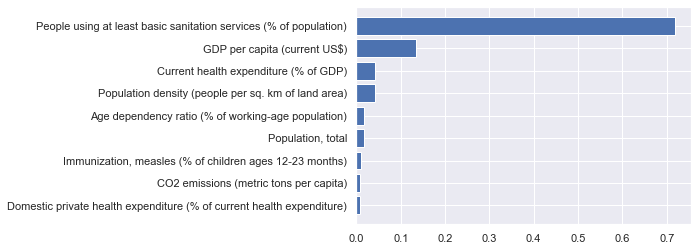

In [96]:
regtree_HALE = DecisionTreeRegressor(random_state = 0, max_depth=6) # reduces overfitting

#regression tree using training data
regtree_HALE.fit(X_train_hale, y_train_hale)

# Predict HALE values in test set using different variables
pred = regtree_HALE.predict(X_test_hale)  
mse = mean_sq_err(y_test_hale, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regtree_HALE.score(X_test_hale, y_test_hale))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

feature_names = ['sanitation', 'co2 emissions', 'age dependency ratio', 'health expenditure', 'private health expenditure', 'GDP per capita', 'measles immunisation', 'population density', 'population']
figure(figsize=(100, 30), dpi=80)
plot_tree(regtree_HALE, filled=True, rounded=True, feature_names=feature_names, fontsize=8)
plt.show()

sorted_list = regtree_HALE.feature_importances_.argsort()
plt.barh(X_test_hale.columns[sorted_list], regtree_HALE.feature_importances_[sorted_list])
plt.show()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.898766378558939
Mean Squared Error (MSE) 	: 8.542100082343302
Root Mean Squared Error (RMSE) 	: 2.9226871338450344


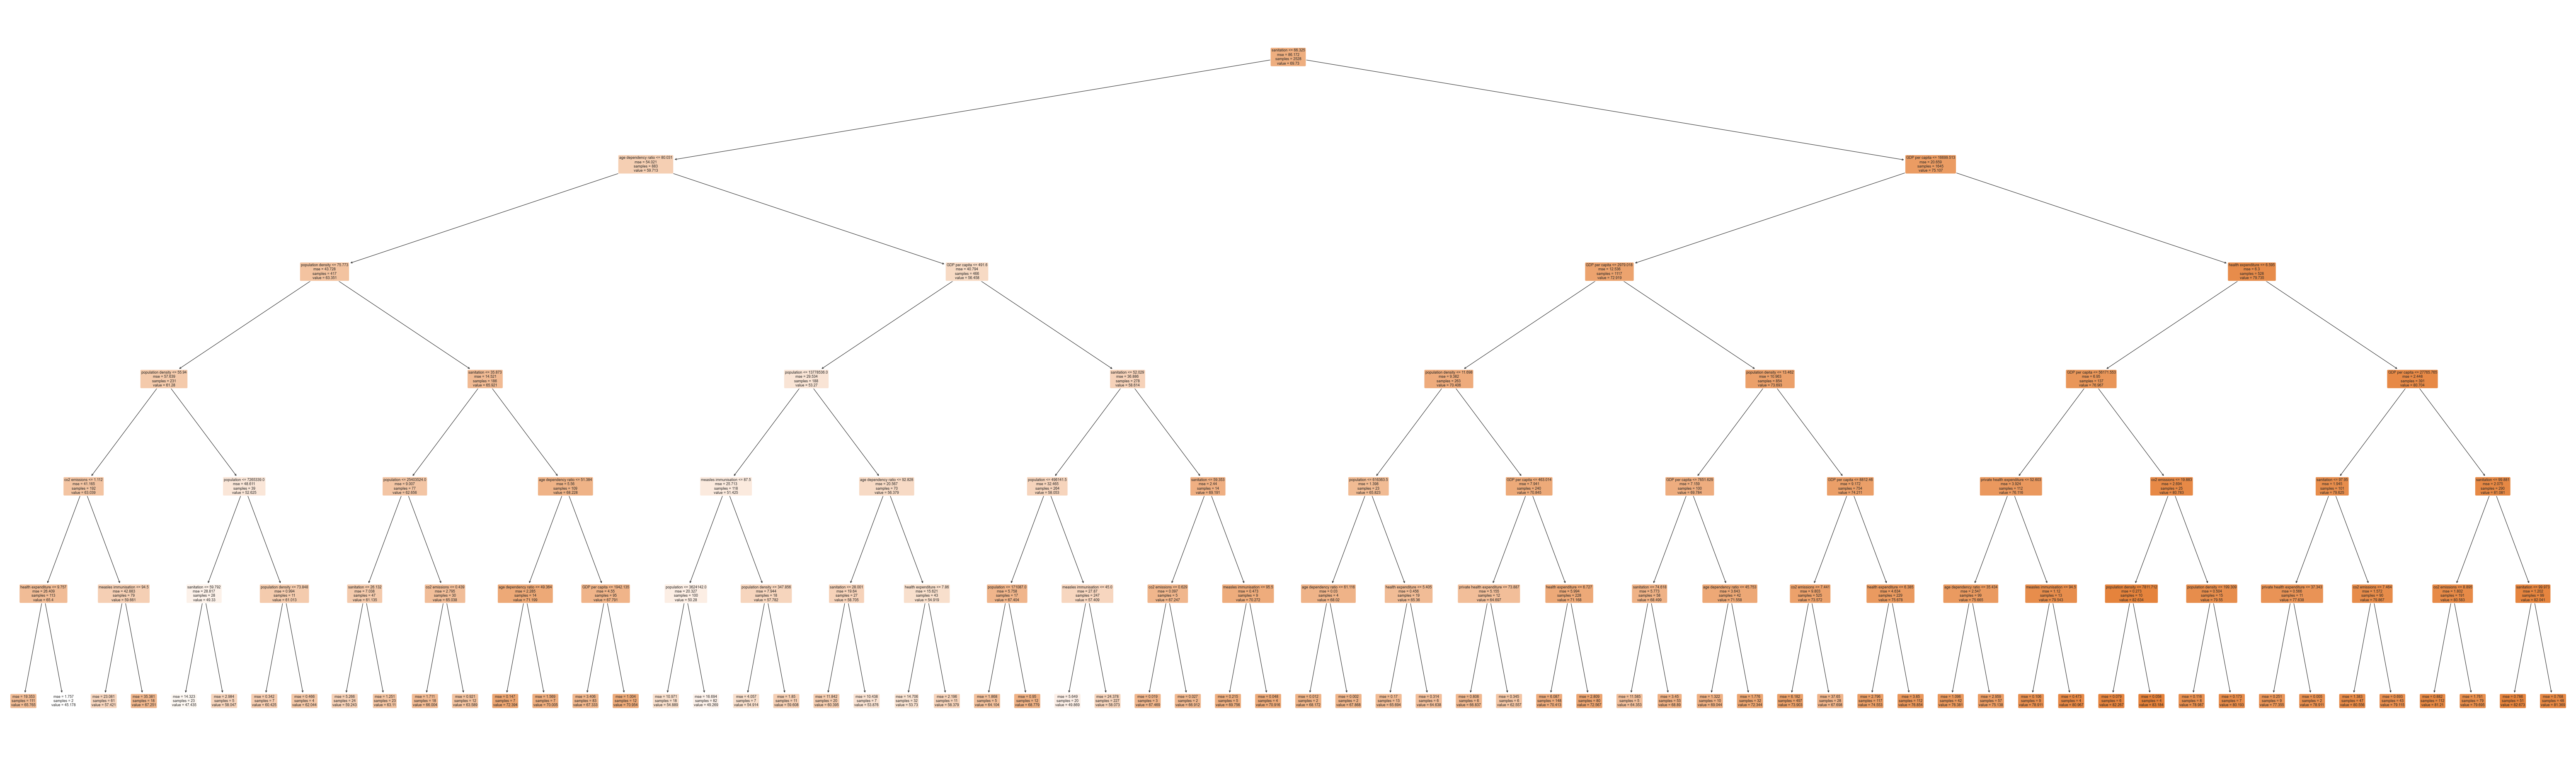

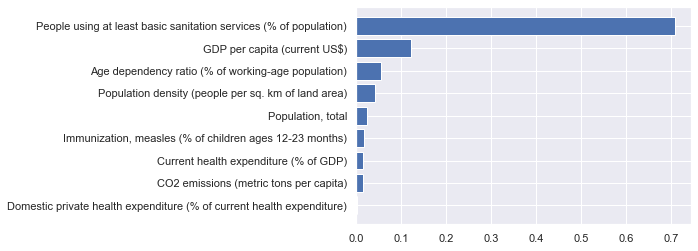

In [97]:
regtree_LE = DecisionTreeRegressor(random_state = 0, max_depth=6) # reduces overfitting

#regression tree using training data
regtree_LE.fit(X_train_le, y_train_le)

# Predict LE values in test set using different variables
pred = regtree_LE.predict(X_test_le)  
mse = mean_sq_err(y_test_le, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regtree_LE.score(X_test_le, y_test_le))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

figure(figsize=(100, 30), dpi=80)
plot_tree(regtree_LE, filled=True, rounded=True, feature_names=feature_names, fontsize=8)
plt.show()

sorted_list = regtree_LE.feature_importances_.argsort()
plt.barh(X_test_le.columns[sorted_list], regtree_LE.feature_importances_[sorted_list])
plt.show()

As expected, the regression trees perform better than standard linear regression model, now having R^2 scores higher than 0.8.
The MSE and RMSE are also reduced considerably. It should be noted that the regression tree model leads to lower error overall than the linear regression model for both HALE and life expectancy, implying it is more accurate and better able to capture the nonlinear relationships between the variables. 

Again, the model used to predict life expectancy does better than the model used to predict HALE. 
Since this is true for both the linear regression and decision tree models, it suggests that our metrics are better at predicting HALE than life expectancy overall.

For both life expectancy and HALE, the two most important metrics for predicting them are percentage of people using at least basic sanitation service and GDP per capita respectively. Current health expenditure now plays a much bigger role in determining both HALE and life expectancy, while measles immunisation plays a much smaller role. This implies that there is a nonlinear relationship between current health expenditure and HALE/LE, while there is a more linear relationship between measles immunisation and HALE/LE.

Now let us visualize this new model. 

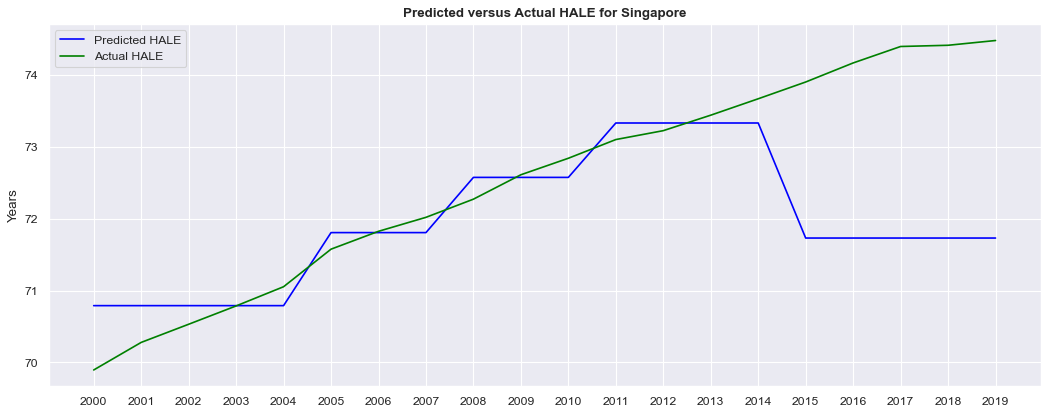

In [98]:
pred_HALE('Singapore', regtree_HALE)

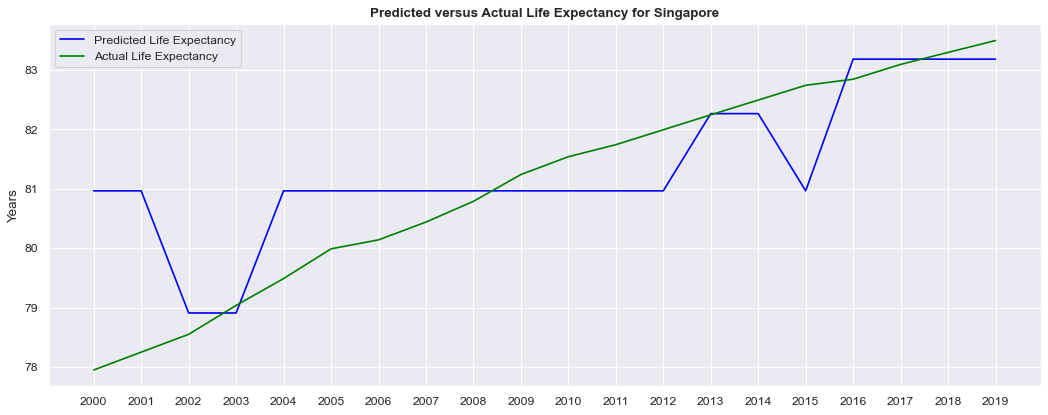

In [99]:
pred_LE('Singapore', regtree_LE)

While the R^2 value implies the regression tree model is more accurate, this model still has major issues: it is less consistent compared to linear regression, and sometimes less responsive to changes in predictor values as we can see in the graph. We suspect this issue arises due to the model overfitting and unable to generalise to other data.

Since, normal regression trees show promising results, we will go one step further and implement random forest model.

We expect random forest regression to have better accuracy since it is a collection of regression trees and can prevent the overfitting problem that regression trees are prone to since random subsets of data will be selected to make predictions on at a time.

---

## Random Forest Regression 

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	 0.8805202339876259
Mean Squared Error (MSE) 	: 7.041280211663849
Root Mean Squared Error (RMSE) 	: 2.653541070280211


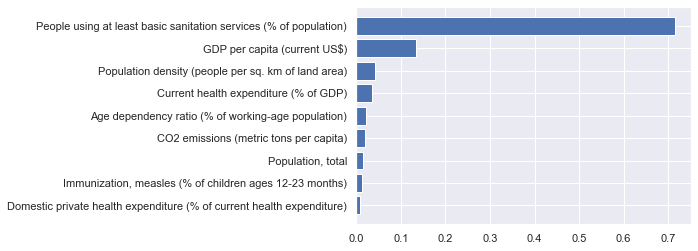

In [100]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor_HALE = RandomForestRegressor(n_estimators = 500, random_state = 0, max_depth=6)

#regression tree using training data
forest_regressor_HALE.fit(X_train_hale, y_train_hale.values.ravel())

# Predict HALE values in test set using different variables
pred = forest_regressor_HALE.predict(X_test_hale)  
mse = mean_sq_err(y_test_hale, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t", forest_regressor_HALE.score(X_test_hale, y_test_hale))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# plot the first 3 trees in the random forest
fig, axes = plt.subplots(nrows = 1,ncols = 3, figsize=(300, 90), dpi=80)
for index in range(3):
    plot_tree(forest_regressor_HALE.estimators_[index],
              filled = True,
              ax = axes[index],
              feature_names=feature_names,
              fontsize=7)

    axes[index].set_title('Estimator: ' + str(index))
plt.show()

sorted_list = forest_regressor_HALE.feature_importances_.argsort()
plt.barh(X_test_hale.columns[sorted_list], forest_regressor_HALE.feature_importances_[sorted_list])
plt.show()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	 0.9310384537276177
Mean Squared Error (MSE) 	: 5.818980114573919
Root Mean Squared Error (RMSE) 	: 2.412256229046558


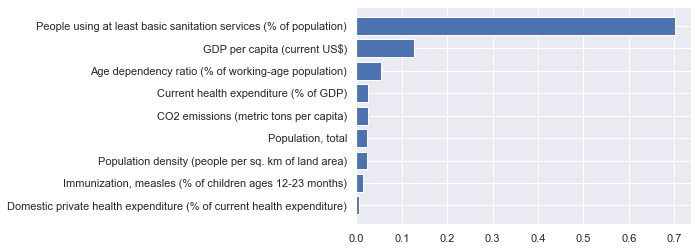

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor_LE = RandomForestRegressor(n_estimators = 500, random_state = 0, max_depth=6)

#regression tree using training data
forest_regressor_LE.fit(X_train_le, y_train_le.values.ravel())

# Predict LE values in test set using different variables
pred = forest_regressor_LE.predict(X_test_le)  
mse = mean_sq_err(y_test_le, pred)


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t", forest_regressor_LE.score(X_test_le, y_test_le))
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

# plot the first 3 trees in the random forest
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(300, 90), dpi=80)
for index in range(3):
    plot_tree(forest_regressor_LE.estimators_[index],
              filled = True,
              ax = axes[index],
              feature_names=feature_names,
              fontsize=7)
plt.show()

sorted_list = forest_regressor_LE.feature_importances_.argsort()
plt.barh(X_test_le.columns[sorted_list], forest_regressor_LE.feature_importances_[sorted_list])
plt.show()

This model is our best one yet. 
While the model still has a lower accuracy for predicting HALE than life expectancy, the random forest models for HALE and LE have the highest R^2 score out of all the models tested (~0.9).
Both models also have lower MSE and RMSE values than their linear regression and regression tree counterparts. 
This makes the random forest model the most effective model for predictng both life expectancy and HALE.

The rankings of the importances of the metrics have also changed for the less important metrics. Domestic private health expenditure is now again at the bottom of the rankings.



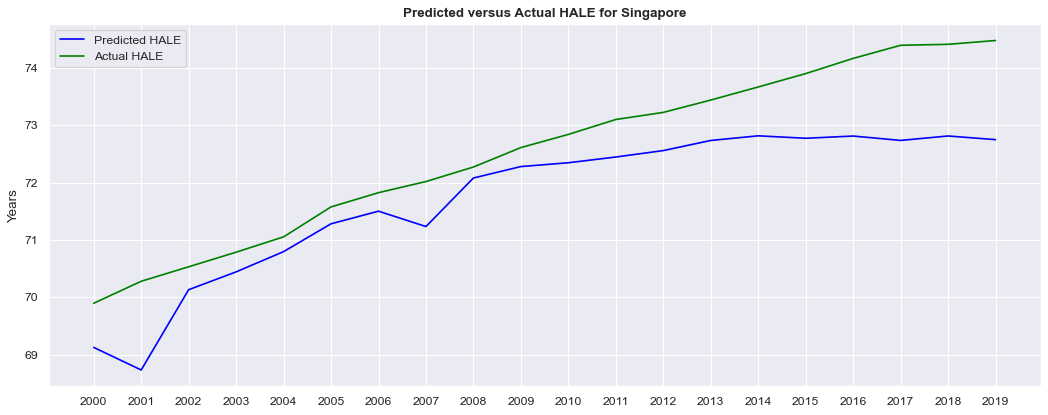

In [102]:
pred_HALE('Singapore', forest_regressor_HALE)

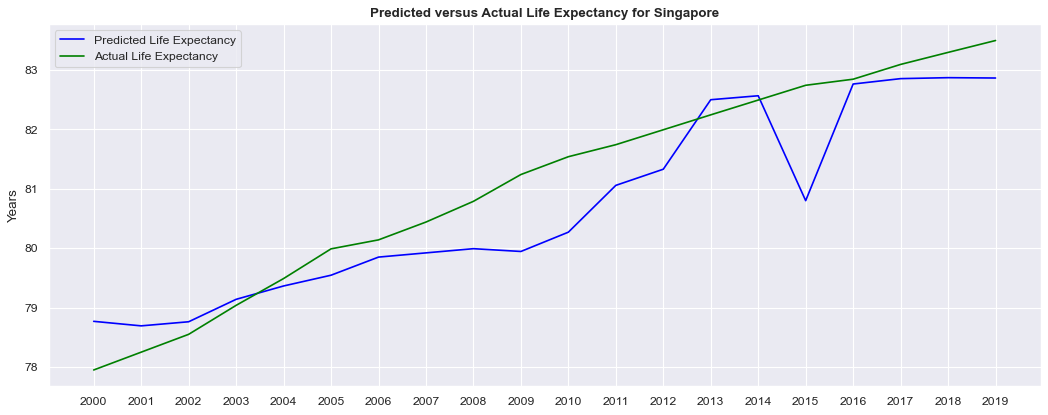

In [103]:
pred_LE('Singapore', forest_regressor_LE)

Clearly shown in the graph, this random forest model shows improvements over the original regression tree, having more accuracy as well as being more consistent and responsive in predictions This makes the random forest model the most effective model for predictng both life expectancy and HALE.

---

# Conclusion

The random forest model was the best at predicting life expectancy and HALE out of all the 3 models. It seems that both life expectancy and HALE had slightly nonlinear relationships with the data, but a sufficiently robust model such as random forest is able to capture these relationships. It seems that overall, the metrics chosen were able to btter predict life expectancy than HALE, but they can still predict HALE with high accuracy.

While using a robust model makes explanation of exactly how a metric affects HALE more difficult to explain, we can see that both access to basic sanitation services and GDP per capita are the most important metrics across all the models, as well as having positive correlations with HALE. Thus, governments seeking to increase HALE can prioritise increasing the two metrics. It can also be seen that current health expenditure brings significant benefits to HALE, domestic private health expenditure has negligible impact on HALE, implying that government expenditure in the healthcare sector is what causes HALE to rise. Furthermore, while both age dependency ratio and population density have a negative impact on both HALE and life expectancy, age dependency ratio affects life expectancy more while population density affects HALE more. Thus a government seeking to improve HALE can know to prioritise addressing the issue of population density.

Given limited resources, our model can inform which areas countries can shift their limited resources in order to increase HALE to ensure everyone lives long, healthy lives.